In [72]:
import numpy as np

from qiskit import *
from qiskit.providers.fake_provider import FakeManila


import matplotlib.pyplot as plt

In [73]:
backend = FakeManila()

In [74]:
from mthree.calibrations import Calibration
from mthree.generators import CompleteGenerator, HadamardGenerator, RandomGenerator

In [75]:
cal = Calibration(backend=backend, generator=CompleteGenerator)

In [76]:
cal.calibrate_from_backend(shots=2**22)

In [77]:
complete_tm_cal = cal.to_texmex_calibration()
print(complete_tm_cal)

{'01111': 2.6226043701171875e-06, '11101': 2.7418136596679688e-06, '11010': 1.049041748046875e-05, '00111': 9.763240814208984e-05, '01101': 0.00011336803436279297, '11000': 0.0004520416259765625, '01001': 0.0031861066818237305, '01011': 7.200241088867188e-05, '00101': 0.004636526107788086, '01110': 1.3232231140136719e-05, '10101': 0.00010907649993896484, '01000': 0.018838882446289062, '10111': 2.6226043701171875e-06, '01100': 0.0006625652313232422, '00011': 0.0027892589569091797, '11100': 1.6450881958007812e-05, '00001': 0.1308058500289917, '10010': 0.00038993358612060547, '10000': 0.018106579780578613, '00010': 0.01630401611328125, '10011': 6.639957427978516e-05, '10110': 1.3470649719238281e-05, '11001': 7.49826431274414e-05, '10001': 0.003072023391723633, '11011': 1.7881393432617188e-06, '10100': 0.0006386041641235352, '00110': 0.0005626678466796875, '11110': 2.384185791015625e-07, '01010': 0.00040853023529052734, '00100': 0.027209043502807617, '00000': 0.7713402509689331}


In [23]:
cal2 = Calibration(backend=backend, generator=HadamardGenerator)

In [24]:
cal2.calibrate_from_backend(shots=int(1e4))

In [25]:
hadamard_tm_cal = cal2.to_texmex_calibration()
print(hadamard_tm_cal)

{'11010': 0.0001, '00111': 0.0001, '01101': 0.0001, '11001': 0.0001, '10001': 0.0034, '10100': 0.00075, '00110': 0.00105, '01001': 0.00265, '01010': 0.00045, '00100': 0.0257, '01100': 0.00035, '00001': 0.1321, '01000': 0.01925, '10010': 0.00035, '00010': 0.01655, '01011': 0.00015, '00101': 0.0038, '10101': 0.0002, '11000': 0.00035, '00011': 0.0028, '00000': 0.771, '10000': 0.0187}


In [26]:
cal3 = Calibration(backend=backend, generator=RandomGenerator, num_random_circuits=2)

In [27]:
cal3.calibrate_from_backend(shots=int(1e4))

In [28]:
random_tm_cal = cal3.to_texmex_calibration()

In [29]:
def tvd(dist1, dist2):
    dist2 = dist2.copy()
    tot = 0
    for key, val in dist1.items():
        val2 = 0
        if key in dist2:
            val2 = dist2[key]
            del dist2[key]
        tot += abs(val-val2)
    # add remaining values from dist2
    tot += sum(dist2.values())
    return 0.5*tot

In [30]:
tvd(hadamard_tm_cal, complete_tm_cal)

0.0035629859924316467

In [31]:
data = []

for num_random in range(2, 64, 2):
    temp = []
    for kk in range(100):
        cal3 = Calibration(backend=backend, generator=RandomGenerator, num_random_circuits=num_random)
        cal3.calibrate_from_backend(shots=2**13)
        temp.append(tvd(cal3.to_texmex_calibration(), complete_tm_cal))
    data.append(temp)

Text(0.5, 1.0, 'ibmq_manila')

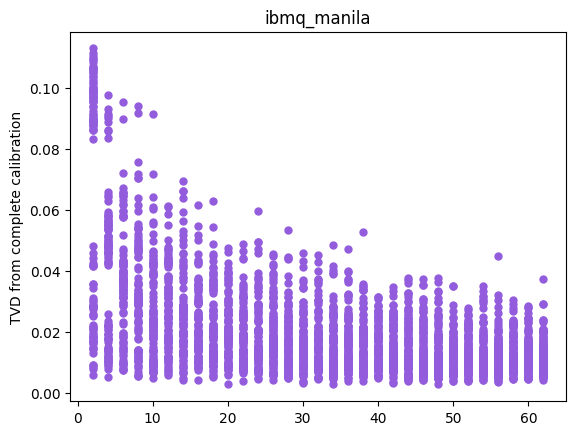

In [32]:
plt.plot(range(2, 64, 2), data, 'o', color = '#925cdd', ms=5)
plt.ylabel('TVD from complete calibration')
plt.title('ibmq_manila')